<a href="https://colab.research.google.com/github/yekcel/AI-Agent-MRI-Image-Defacing/blob/main/MRI-Face-Detection-Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install roboflow -q
!pip install -q google-genai
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 19.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 69.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 97.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 59.5 MB/s eta 0:00:00


In [2]:
from roboflow import Roboflow
rf = Roboflow(api_key="eArI4OGHmxiSrmwdJbV5")
project = rf.workspace("amir-project").project("mri-jsm7l-ncqhd")
version = project.version(1)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to mri-1 in yolov8:: 100%|██████████| 352/352 [00:00<00:00, 3994.12it/s]


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [3]:
import yaml
from ultralytics import YOLO


yaml_path = '/content/mri-1/data.yaml'

with open(yaml_path, 'r') as f:
    config = yaml.safe_load(f)


config['train'] = '/content/mri-1/train/images'
config['val'] = '/content/mri-1/valid/images'
config['test'] = '/content/mri-1/test/images'

with open(yaml_path, 'w') as f:
    yaml.dump(config, f)

print("✅ address of  YAML were corrected. start training")


model = YOLO('yolo11n.pt')

model.train(
    data=yaml_path,
    epochs=50,
    imgsz=640,
    device=0,
    project='MRI_Project',
    name='eye_nose_run'
)

✅ address of  YAML were corrected. start training
Ultralytics 8.3.243 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/mri-1/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=eye_nose_run, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True,

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ecd1df79880>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

Test the model on  5  first images from Test:

image 1/1 /content/mri-1/test/images/dicom_002289_jpg.rf.d45a8925b6ee1e8436faf31aa52ee7cc.jpg: 640x640 1 eye_nose, 17.5ms
Speed: 2.2ms preprocess, 17.5ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)


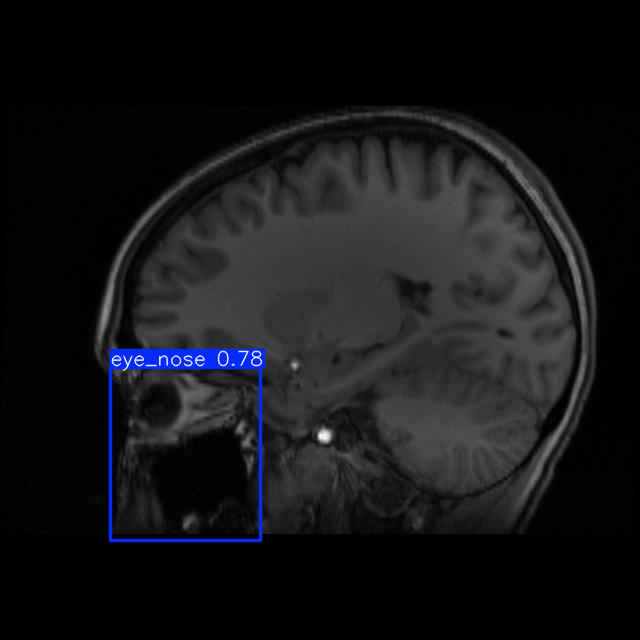


image 1/1 /content/mri-1/test/images/dicom_002864_jpg.rf.873822d1556020324659036cb32c5585.jpg: 640x640 1 eye_nose, 18.2ms
Speed: 2.1ms preprocess, 18.2ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)


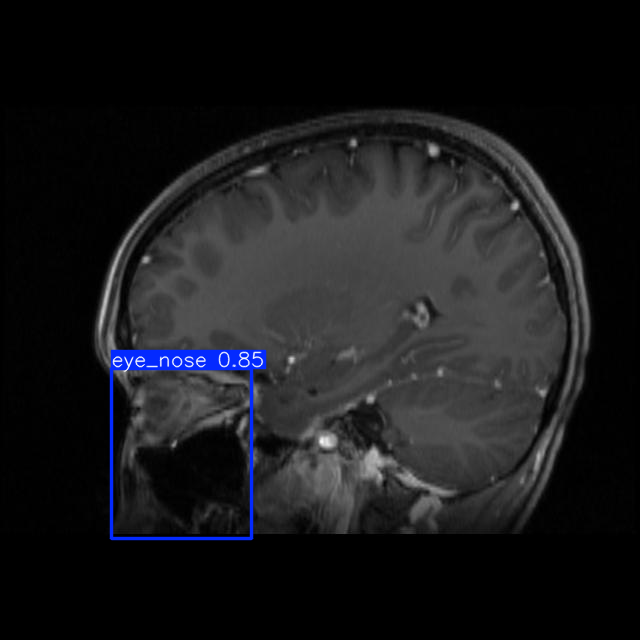


image 1/1 /content/mri-1/test/images/dicom_005097_jpg.rf.c7030be36ed600d5bba88e5f70f5060d.jpg: 640x640 1 eye_nose, 12.1ms
Speed: 3.9ms preprocess, 12.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


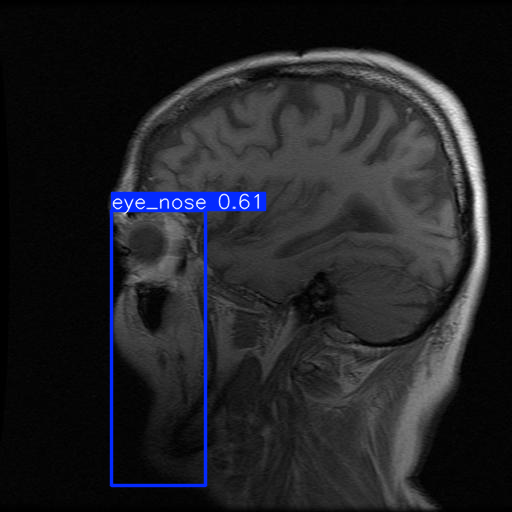


image 1/1 /content/mri-1/test/images/dicom_005098_jpg.rf.7d511e37109bed2612cc41135647fc92.jpg: 640x640 1 eye_nose, 13.2ms
Speed: 3.8ms preprocess, 13.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


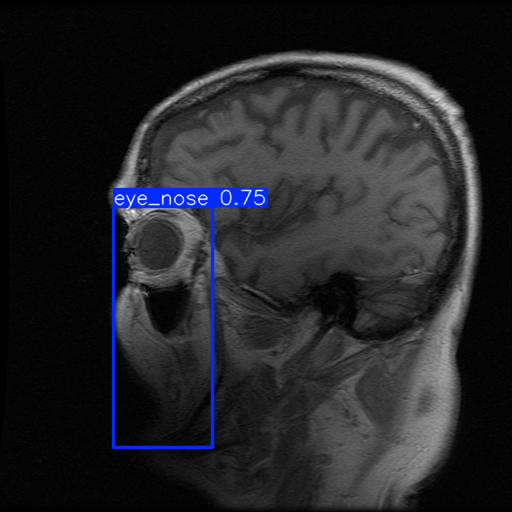


image 1/1 /content/mri-1/test/images/dicom_000209_jpg.rf.68d7b19c0c5017332d18516147668c4f.jpg: 640x640 1 eye_nose, 13.1ms
Speed: 3.6ms preprocess, 13.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


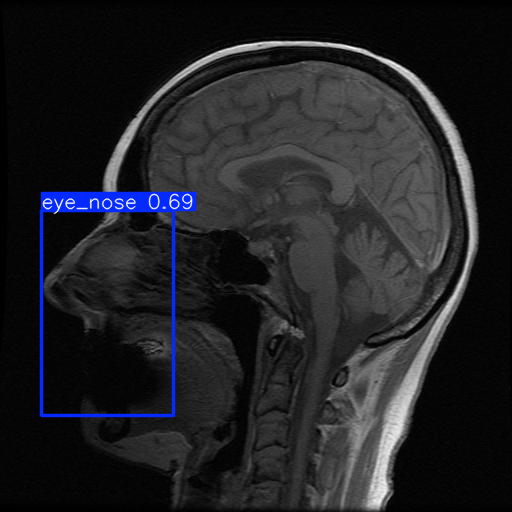

In [4]:
from ultralytics import YOLO
import glob
from google.colab.patches import cv2_imshow


model = YOLO('/content/MRI_Project/eye_nose_run/weights/best.pt')


test_images = glob.glob("/content/mri-1/test/images/*.jpg")

print(f"Test the model on  {len(test_images[:5])}  first images from Test:")

for img_path in test_images[:5]:
    results = model.predict(source=img_path, conf=0.5)
    for r in results:
        res_plotted = r.plot()
        cv2_imshow(res_plotted)